In [2]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_stim_100.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_delay_100.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_far_resp_100.xlsx',
              
              'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_stim_100.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_delay_100.xlsx',
             'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_close_resp_100.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_stim_100.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_delay_100.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_far_resp_100.xlsx',
                    
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_stim_100.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_delay_100.xlsx',
                    'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_close_resp_100.xlsx']


In [4]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_stim_100.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_delay_100.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_far_resp_100.xlsx',
                  
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_stim_100.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_delay_100.xlsx', 
                  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_close_resp_100.xlsx']

paths_distractor_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_stim_100.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_delay_100.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_far_resp_100.xlsx',
                        
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_stim_100.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_delay_100.xlsx', 
                        'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_close_resp_100.xlsx']

In [5]:
df_target=[]
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)


In [6]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)

####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    distance = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[4]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    df_x['distance'] = distance
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)

In [7]:
#### Hay que substract!

In [8]:
df = pd.concat([df_target, df_distractor])
df['label']= df['item'] + ' ' + df['distance'] 
df['label'] = df['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-6.452111,ips,n001,2_0.2,tf,target,stim,far
1,2.335,-5.357404,ips,n001,2_0.2,tf,target,stim,far
2,4.670,2.072382,ips,n001,2_0.2,tf,target,stim,far
3,7.005,10.049902,ips,n001,2_0.2,tf,target,stim,far
4,9.340,7.811707,ips,n001,2_0.2,tf,target,stim,far


In [9]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff['label']= df_shuff['item'] + ' ' + df_shuff['distance'] 
df_shuff['label'] = df_shuff['label'].replace(['target close', 'target far', 'dist close', 'dist far'], ['tc', 'tf', 'dc', 'df'])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained,distance
0,0.000,-0.764486,visual,d001,1_0.2,tf,target,stim,far
1,2.335,-0.821425,visual,d001,1_0.2,tf,target,stim,far
2,4.670,-0.009759,visual,d001,1_0.2,tf,target,stim,far
3,7.005,0.514989,visual,d001,1_0.2,tf,target,stim,far
4,9.340,0.481820,visual,d001,1_0.2,tf,target,stim,far


In [10]:
df_delay=[]
for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in ['stim', 'delay', 'resp']:
                    for item in ['target', 'dist']:
                        ####
                        if cond == '1_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['distance']==dist) & (df['trained']==trained) & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                     ( df_shuff['item']==item)]
                            
                            ###
                            decoding = dfn.decoding.mean() #option1
                            decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, trained, dist] )
                            #                    
                        elif cond == '2_0.2':
                            dfn = df.loc[(df['region']==reg) & 
                                     ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                                     ( df['condition']==cond) & (df['subject']==subj) &  
                                     ( df['distance']==dist) & (df['trained']==trained) & 
                                     ( df['item']==item)]
                            #
                            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                     ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                     ( df_shuff['item']==item)]
                            
                            ###
                            decoding = dfn.decoding.mean() #option1
                            decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                            ###
                            df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                          item, trained, dist] )    
                            #
                        elif cond =='1_7':
                            if item=='target':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                            elif item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )        
                                #
                            #
                        #
                        elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                            if item=='target':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                                #
                            elif item=='dist':
                                dfn = df.loc[(df['region']==reg) & 
                                         ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                         ( df['condition']==cond) & (df['subject']==subj) &  
                                         ( df['distance']==dist) & (df['trained']==trained) & 
                                         ( df['item']==item)]
                                #
                                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                         ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                         ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                         ( df_shuff['item']==item)]

                                ###
                                decoding = dfn.decoding.mean() #option1
                                decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                                ###
                                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                              item, trained, dist] )   
                            ####
                            
                       
####

df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']


In [11]:
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained,distance
0,delay,-1.932018,-1.805744,visual,d001,1_0.2,tc,target,stim,close
1,delay,-2.151993,-2.246617,visual,d001,1_0.2,dc,dist,stim,close
2,delay,1.233187,1.152249,visual,d001,1_0.2,tc,target,delay,close
3,delay,-0.720974,-0.759293,visual,d001,1_0.2,dc,dist,delay,close
4,delay,0.434059,0.259706,visual,d001,1_0.2,tc,target,resp,close


In [13]:
### Coexisting

Text(0.5,1,'coexisting traget/dist')

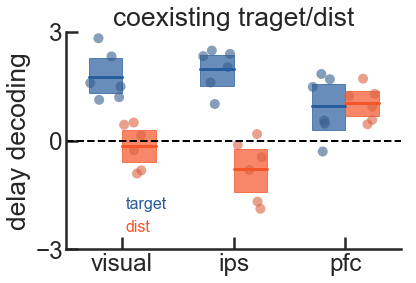

In [14]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
plt.gca().set_ylim(-3,3)
plt.gca().set_yticks([-3,0,3])
plt.title('coexisting traget/dist')

In [15]:
## Stats
res_m = smf.mixedlm(formula='decoding_sh ~ item*region', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')  ],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7') , 'subject']).fit()
print(res_m.summary())


res_m = smf.mixedlm(formula='decoding_sh ~ item*region', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')  & (df_delay['region']!='visual')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7') & (df_delay['region']!='visual') , 'subject']).fit()
print(res_m.summary())

print('')
print('')
print('REGRESSION PER REGION')
print('')
print('')

res_m = smf.mixedlm(formula='decoding_sh ~ item', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')  & (df_delay['region']=='visual')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7') & (df_delay['region']=='visual') , 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='decoding_sh ~ item', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')  & (df_delay['region']=='ips')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7') & (df_delay['region']=='ips') , 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='decoding_sh ~ item', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')  & (df_delay['region']=='pfc')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7') & (df_delay['region']=='pfc') , 'subject']).fit()
print(res_m.summary())


                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      decoding_sh
No. Observations:        144          Method:                  REML       
No. Groups:              6            Scale:                   1.7727     
Min. group size:         24           Likelihood:              -246.8626  
Max. group size:         24           Converged:               Yes        
Mean group size:         24.0                                             
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                       -0.795    0.298 -2.663 0.008 -1.380 -0.210
item[T.target]                   2.770    0.384  7.207 0.000  2.017  3.523
region[T.pfc]                    1.825    0.384  4.749 0.000  1.072  2.579
region[T.visual]                 0.643    0.

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 48      Method:             REML       
No. Groups:       6       Scale:              1.5039     
Min. group size:  8       Likelihood:         -77.8699   
Max. group size:  8       Converged:          No         
Mean group size:  8.0                                    
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.152    0.251 -0.606 0.545 -0.645  0.340
item[T.target]  1.910    0.354  5.397 0.000  1.217  2.604
Group Var       0.003    0.123                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 48      Method:             REML       
No. Groups:       6       Scale:              1.7488     
Min. group size:  8       Likelihood:         -84.4127   
Max. group size:  8       Converged:          No         
Mean group size:  8.0                                    
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      -0.795    0.403 -1.970 0.049 -1.586 -0.004
item[T.target]  2.770    0.382  7.256 0.000  2.022  3.518
Group Var       0.539                                    

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 48      Method:             REML       
No. Groups:       6       Scale:              2.0509     
Min. group size:  8       Likelih

Text(0.5,1,'isolated target/dist')

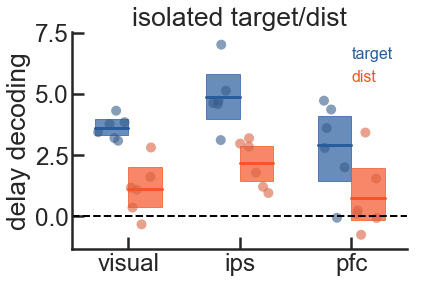

In [17]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
#plt.gca().set_ylim(-3,3)
#plt.gca().set_yticks([-3,0,3])
plt.title('isolated target/dist')

In [30]:
## also the pfc dist is sign above 0
import scipy
scipy.stats.ttest_1samp( df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']=='2_7') & 
             (df_delay['item']=='dist') & (df_delay['region']=='pfc'), 'decoding_sh'].values, 0 )

Ttest_1sampResult(statistic=4.490783118038893, pvalue=0.0009149933807182124)

In [18]:
res_m = smf.mixedlm(formula='decoding_sh ~ item', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')  & (df_delay['region']=='visual')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2') & (df_delay['region']=='visual') , 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='decoding_sh ~ item', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')  & (df_delay['region']=='ips')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2') & (df_delay['region']=='ips') , 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='decoding_sh ~ item', 
                    data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')  & (df_delay['region']=='pfc')],
                    groups=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2') & (df_delay['region']=='pfc') , 'subject']).fit()
print(res_m.summary())


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 48      Method:             REML       
No. Groups:       6       Scale:              8.6487     
Min. group size:  8       Likelihood:         -118.0729  
Max. group size:  8       Converged:          No         
Mean group size:  8.0                                    
---------------------------------------------------------
                 Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept        1.124    0.601 1.871 0.061 -0.053  2.301
item[T.target]   2.487    0.849 2.930 0.003  0.823  4.151
Group Var        0.001                                   

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 48      Method:             REML       
No. Groups:       6       Scale:              11.1686    
Min. group size:  8       Likelih

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: decoding_sh
No. Observations: 48      Method:             REML       
No. Groups:       6       Scale:              10.0624    
Min. group size:  8       Likelihood:         -121.5914  
Max. group size:  8       Converged:          No         
Mean group size:  8.0                                    
---------------------------------------------------------
                 Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept        0.753    0.650 1.158 0.247 -0.521  2.027
item[T.target]   2.154    0.916 2.352 0.019  0.359  3.949
Group Var        0.020    0.930                          



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


#### Complete time course 

In [ ]:
df_time=[]

for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for dist in ['close','far']: ##falta el close
                for trained in ['stim', 'delay', 'resp']:
                    for item in ['target', 'dist']:
                        for t in df.times.unique(): 
                            dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                                   ( df['condition']==cond) & (df['subject']==subj) &  
                                   ( df['distance']==dist) & (df['trained']==trained) & 
                                   ( df['item']==item)]
                            #
                            dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                                   ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                   ( df_shuff['distance']==dist) & (df_shuff['trained']==trained) & 
                                   ( df_shuff['item']==item)].decoding.mean()
                            #
                            decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                            df_time.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item, trained, dist] )   
                            ####)
#
df_time = pd.DataFrame(df_time)
df_time.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item', 'trained', 'distance']



In [ ]:
df_time.head()

In [ ]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active


def tiemcourse_4_conditions(df_plot, title_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = ['darkblue',  'darkorange',  'darkgreen'] #sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(12,10))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -10 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 10 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
        #
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.ylim(-20, 20)
        plt.yticks([-20, -10, 0 , 10, 20])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(frameon=False, bbox_to_anchor=(1.1, 1.05), fontsize=15)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=1, h_pad=1, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    

In [ ]:
df_x = df_time.loc[(df_time['trained']=='delay') & (df_time['item']=='target') ]
tiemcourse_4_conditions(df_x , 'TR:delay; I:target')

In [ ]:
df_x = df_time.loc[(df_time['trained']=='delay') & (df_time['item']=='dist') ]
tiemcourse_4_conditions(df_x , 'TR:delay; I:dist')

In [ ]:
df_x = df_time.loc[(df_time['trained']=='stim') & (df_time['item']=='target') ]
tiemcourse_4_conditions(df_x , 'TR:stim. pres.; I:target')

In [ ]:
df_x = df_time.loc[(df_time['trained']=='stim') & (df_time['item']=='dist') ]
tiemcourse_4_conditions(df_x , 'TR:stim. pres.; I:dist')

In [ ]:
df_x = df_time.loc[(df_time['trained']=='resp') & (df_time['item']=='target') ]
tiemcourse_4_conditions(df_x , 'TR:resp.; I:target')

In [ ]:
df_x = df_time.loc[(df_time['trained']=='resp') & (df_time['item']=='dist') ]
tiemcourse_4_conditions(df_x , 'TR:resp.; I:dist')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


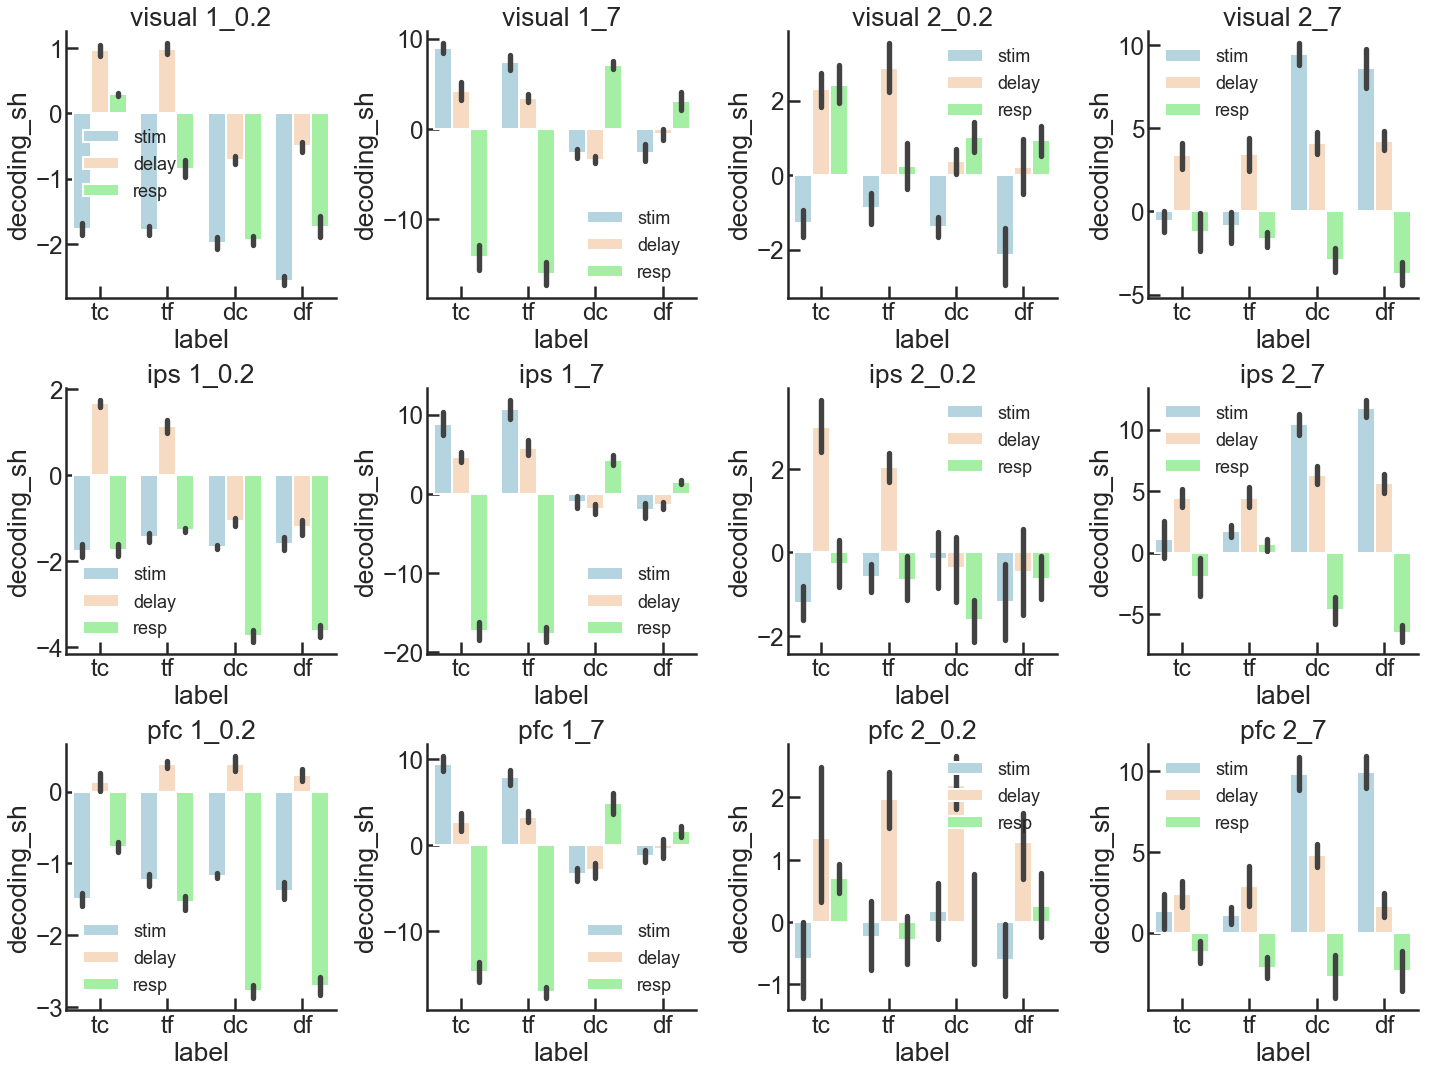

In [21]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tc', 'tf', 'dc', 'df'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


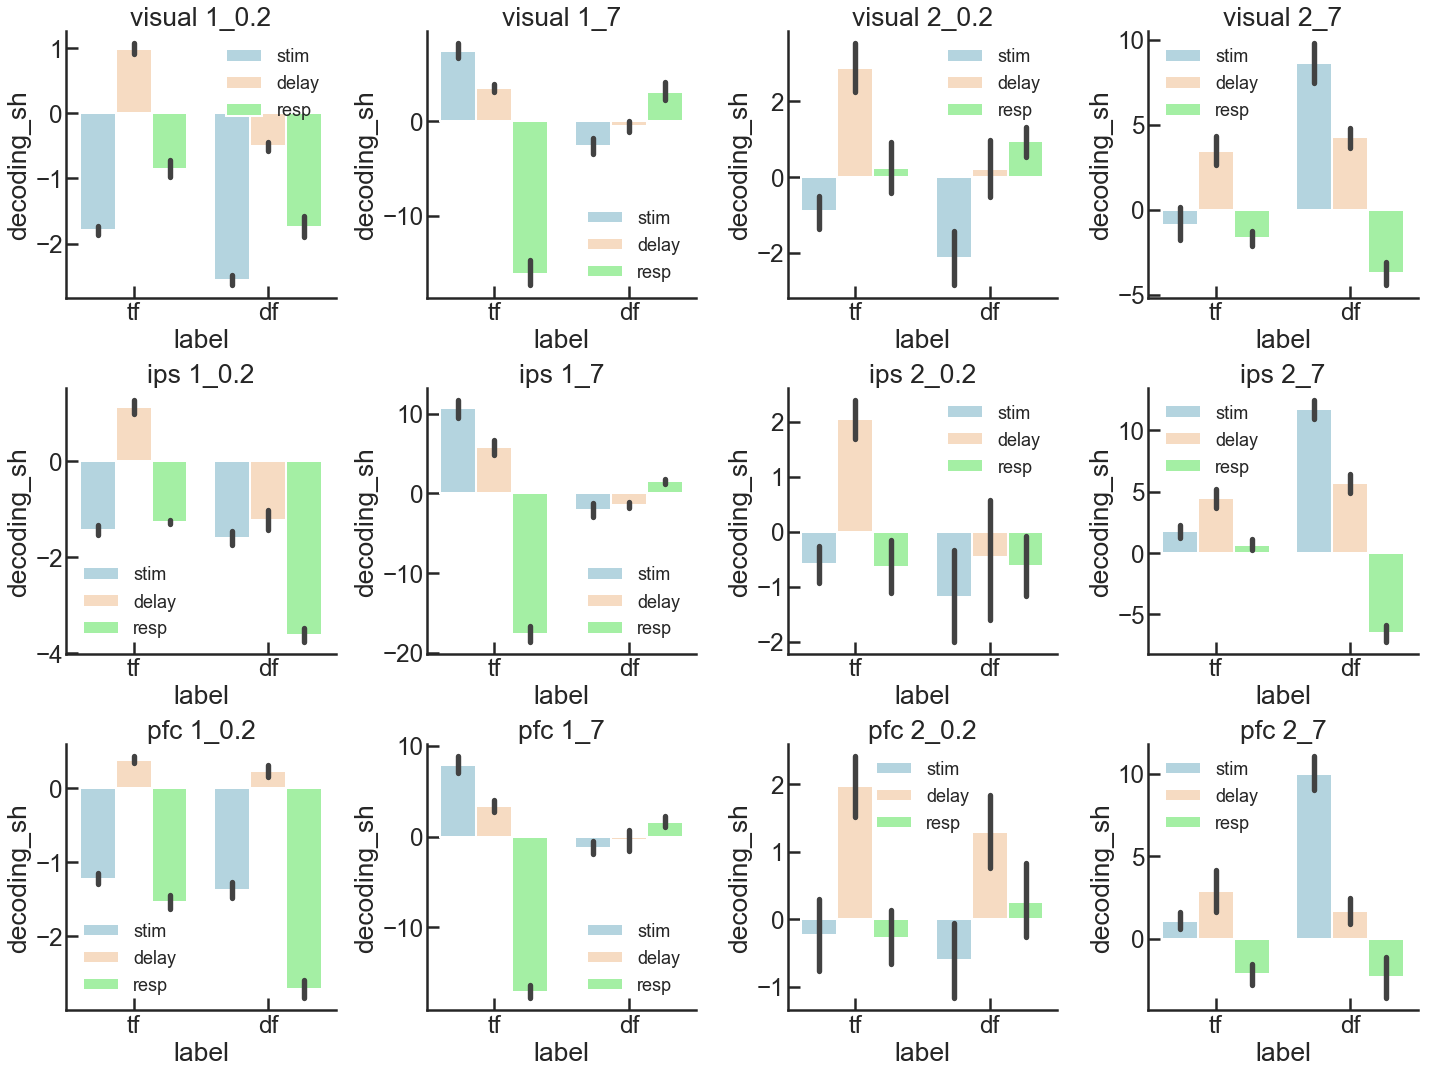

In [22]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tf', 'df'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


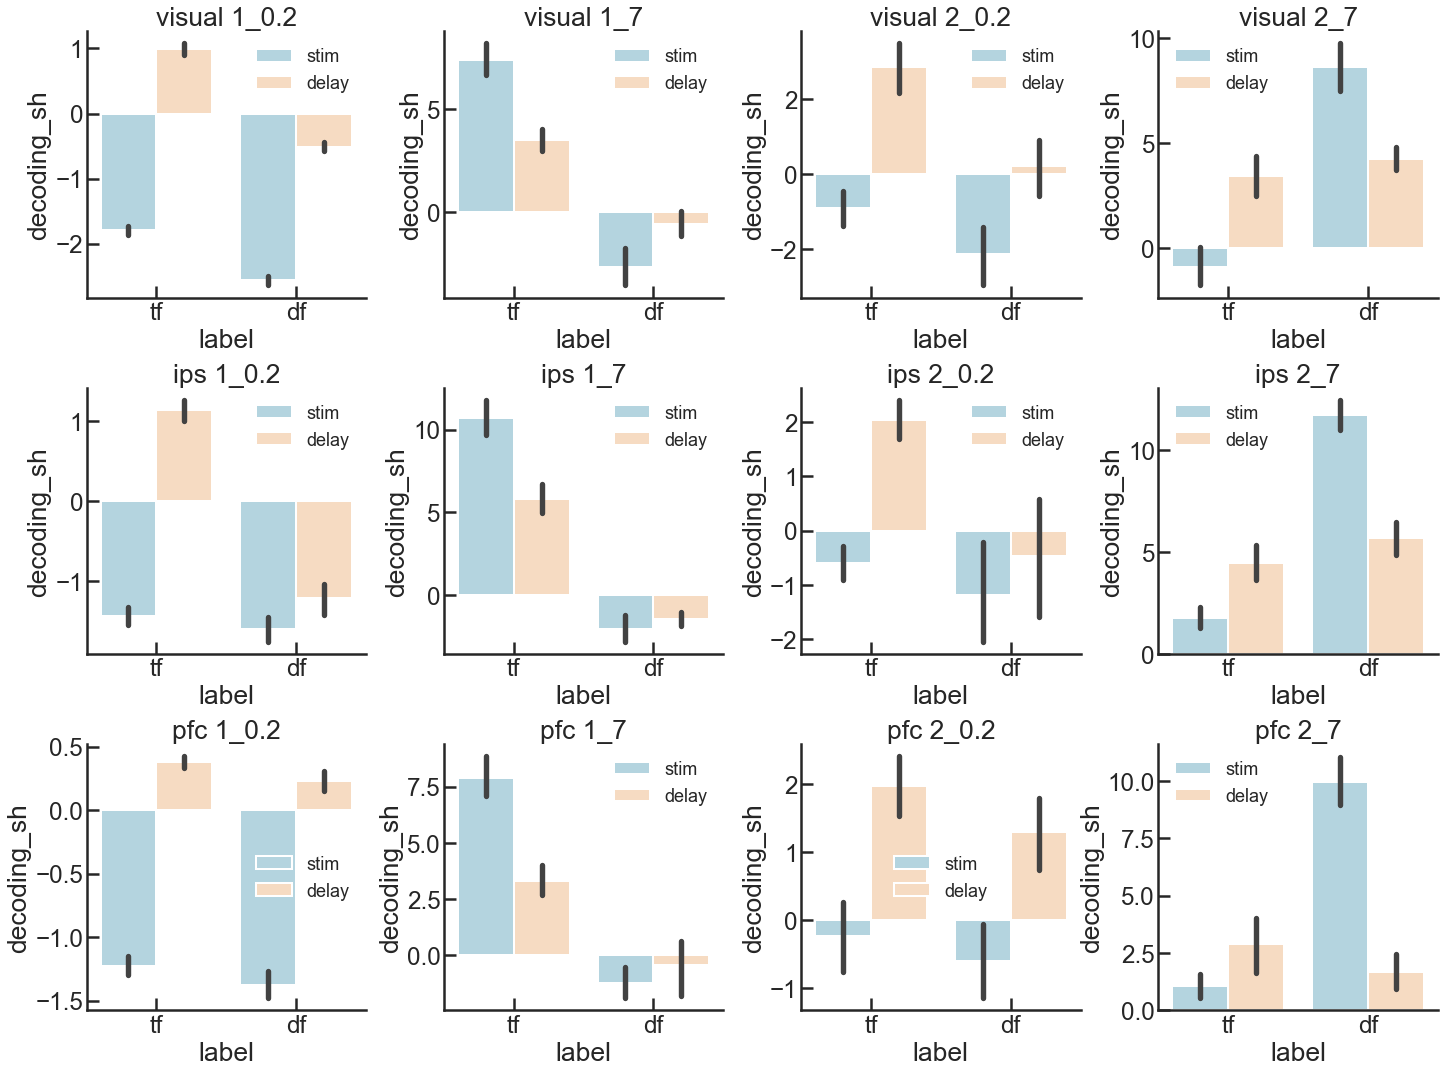

In [23]:
plt.figure(figsize=(20,15))

for idx_a, A in enumerate(['visual', 'ips', 'pfc']):
    for idx_c, C in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']):
        plt.subplot(3,4, 4*idx_a+idx_c+1)
        sns.barplot(x='label', y='decoding_sh', hue='trained', order=['tf', 'df'], hue_order=['stim', 'delay'],
                    data=df_delay.loc[(df_delay['condition']==C) & (df_delay['region']==A)], 
                    palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='in') #direction
        plt.legend(loc='best', frameon=False, prop={'size': 18})
        plt.title(A + ' ' + C)
        plt.xticks(rotation=0)
        

plt.tight_layout()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'target decoding')

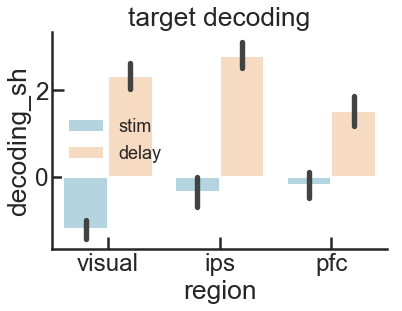

In [24]:
sns.barplot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], hue_order=['stim', 'delay'],
            data=df_delay.loc[(df_delay['item']=='target') & (df_delay['condition']!='1_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('target decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'distractor decoding')

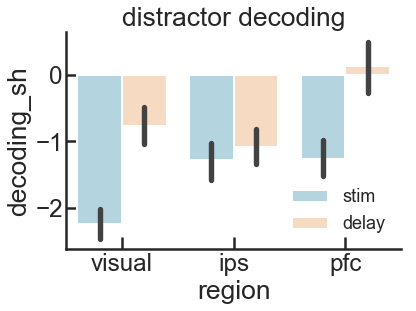

In [25]:
sns.barplot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], hue_order=['stim', 'delay'],
            data=df_delay.loc[(df_delay['item']=='dist') & (df_delay['condition']!='2_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('distractor decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'')

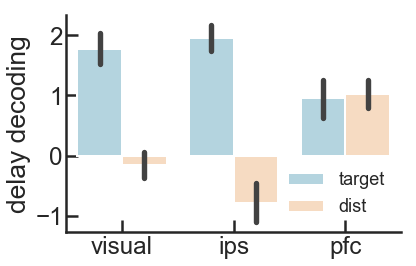

In [45]:
sns.barplot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xlabel('')
plt.ylabel('delay decoding')
plt.title('')

In [48]:
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained,distance
0,delay,-1.932018,-1.792534,visual,d001,1_0.2,tc,target,stim,close
1,delay,-2.151991,-2.261918,visual,d001,1_0.2,dc,dist,stim,close
2,delay,1.238720,1.150621,visual,d001,1_0.2,tc,target,delay,close
3,delay,-0.720974,-0.725406,visual,d001,1_0.2,dc,dist,delay,close
4,delay,0.434070,0.251041,visual,d001,1_0.2,tc,target,resp,close


Text(0.5,1,'coexisting traget/dist')

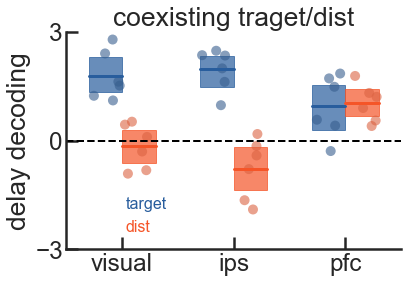

In [79]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
plt.gca().set_ylim(-3,3)
plt.gca().set_yticks([-3,0,3])
plt.title('coexisting traget/dist')

Text(0.5,1,'isolated target/dist')

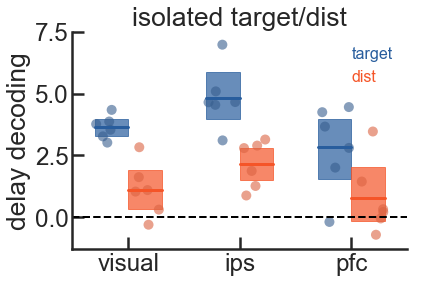

In [80]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
#plt.gca().set_ylim(-3,3)
#plt.gca().set_yticks([-3,0,3])
plt.title('isolated target/dist')

Text(0.5,1,'coexisting traget/dist')

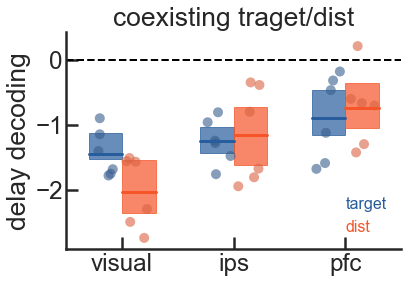

In [81]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='stim') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
# plt.gca().set_ylim(-3,3)
# plt.gca().set_yticks([-3,0,3])
plt.title('coexisting traget/dist')

Text(0.5,1,'isolated traget/dist')

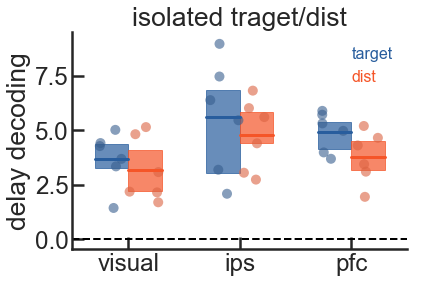

In [82]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='stim') & (df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=10, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
# plt.gca().set_ylim(-3,3)
# plt.gca().set_yticks([-3,0,3])
plt.title('isolated traget/dist')

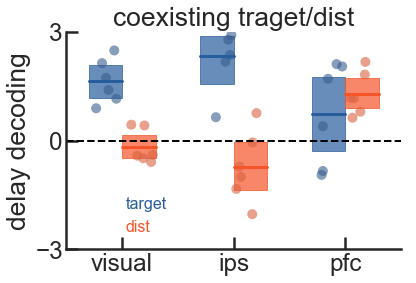

Text(0.5,1,'coexisting traget/dist')

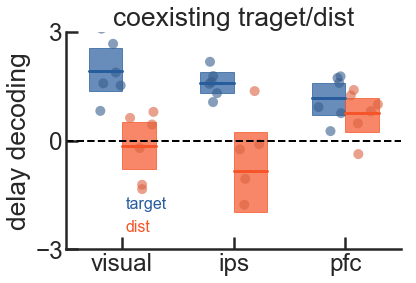

In [83]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['distance']=='close') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
plt.gca().set_ylim(-3,3)
plt.gca().set_yticks([-3,0,3])
plt.title('coexisting traget/dist')
plt.show()

linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['distance']=='far') & (df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')
plt.gca().set_ylim(-3,3)
plt.gca().set_yticks([-3,0,3])
plt.title('coexisting traget/dist')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'decoding')

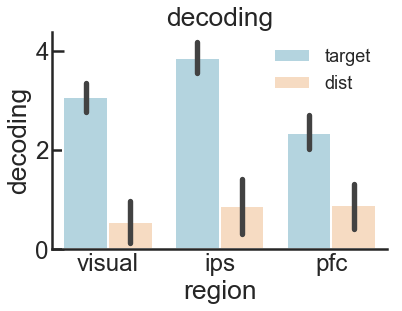

In [39]:
sns.barplot(x='region', y='decoding', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            data=df_delay.loc[(df_delay['trained']=='delay')], 
            palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.title('decoding')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


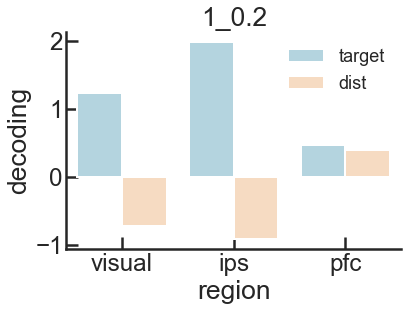

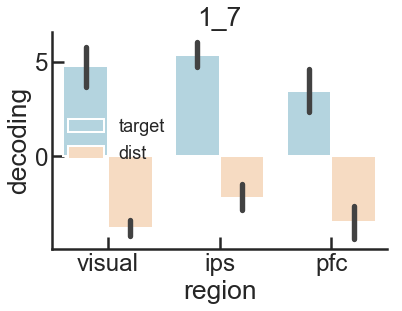

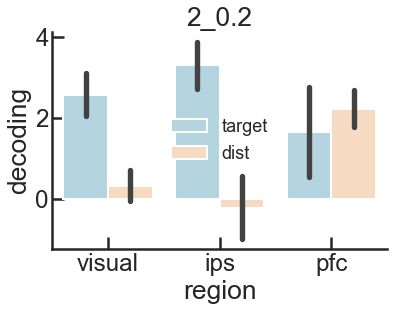

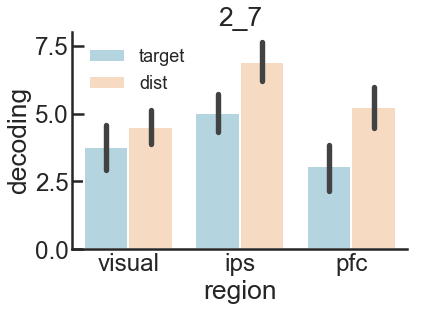

In [37]:
for C in ['1_0.2', '1_7', '2_0.2', '2_7']:
    sns.barplot(x='region', y='decoding', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
                data=df_delay.loc[(df_delay['trained']=='delay') & (df_delay['condition']==C) &
                                  (df_delay['distance']=='close')], 
                palette=['lightblue', 'peachpuff', 'palegreen'], ci=68)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.legend(loc='best', frameon=False, prop={'size': 18})
    plt.title(C)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


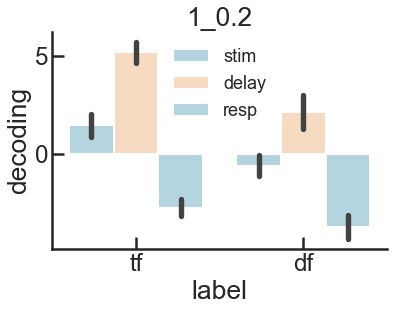

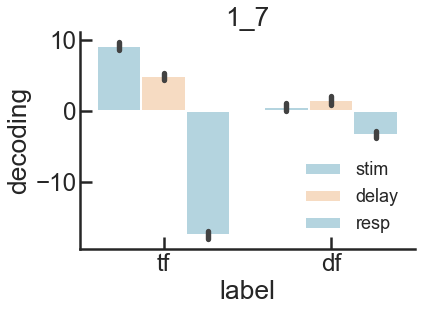

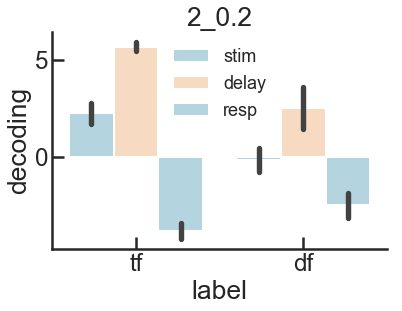

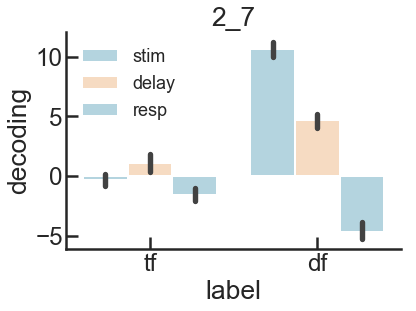

In [61]:
for C in ['1_0.2', '1_7', '2_0.2', '2_7']: 
    sns.barplot(x='label', y='decoding', hue='trained', data=df_delay.loc[df_delay['condition']==C],
                ci=68, palette=['lightblue', 'peachpuff'])
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='in') #direction
    plt.legend(loc='best', frameon=False, prop={'size': 18})
    plt.xticks(rotation=0)
    plt.title(C)
    plt.show()

In [18]:
dfn = df.loc[(df['region']=='pfc') &  (df['times']== 9.34 | df['times']== 11.675  ) ]

sns.barplot(x='label', y='decoding', hue='trained', data=dfn, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()


TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [ ]:
## Colapsandolo todo: Condition y area
sns.barplot(x='label', y='decoding', hue='trained', data=df, ci=68, palette=['lightblue', 'peachpuff'])
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.legend(loc='best', frameon=False, prop={'size': 18})
plt.xticks(rotation=0)
plt.show()